In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yusufkorayhasdemir/fer2013csv")

print("Path to dataset files:", path)

100%|██████████| 96.6M/96.6M [00:00<00:00, 164MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yusufkorayhasdemir/fer2013csv/versions/1


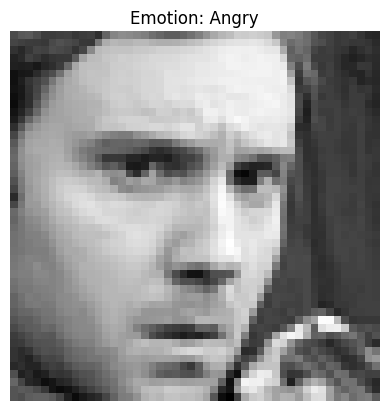

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 190ms/step - accuracy: 0.2839 - loss: 1.7675 - val_accuracy: 0.4288 - val_loss: 1.4842
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.4117 - loss: 1.5128 - val_accuracy: 0.4756 - val_loss: 1.3824
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.4596 - loss: 1.4109 - val_accuracy: 0.4948 - val_loss: 1.3480
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 138s 180ms/step - accuracy: 0.4901 - loss: 1.3441 - val_accuracy: 0.4969 - val_loss: 1.3208
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 178ms/step - accuracy: 0.5094 - loss: 1.2913 - val_accuracy: 0.5114 - val_loss: 1.2827
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - accuracy: 0.5286 - loss: 1.2355 - val_accuracy: 0.5084 - val_loss: 1.2900
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.5424 - loss: 1.1992 - val_accuracy: 0.5272 - val_loss: 1.2536
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.5557 - loss: 

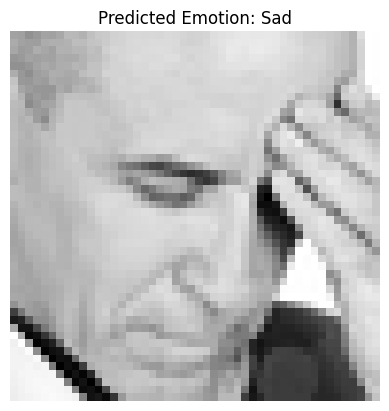

In [7]:
# Emotion Recognition Using FER2013 Dataset
# Author: Maria Hawari
# Description: A CNN-based deep learning model for emotion recognition using the FER2013 dataset.

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 2: Load the Dataset
df = pd.read_csv(path + "/fer2013.csv")

# Step 3: Define Emotion Labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Step 4: Visualize a Sample Image
pixels = df['pixels'][0]
emotion = df['emotion'][0]
emotion_name = emotion_labels[emotion]
pixels_array = np.fromstring(pixels, sep=' ').reshape(48, 48)

import matplotlib.pyplot as plt
plt.imshow(pixels_array, cmap='gray')
plt.title(f'Emotion: {emotion_name}')
plt.axis('off')
plt.show()

# Step 5: Preprocess the Dataset
X = np.array([np.fromstring(p, sep=' ').reshape(48, 48) for p in df['pixels']])
X = X / 255.0
X = X.reshape(-1, 48, 48, 1)
y = to_categorical(df['emotion'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 6: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Step 8: Predict and Display a Sample Image
sample_index = 0
prediction = model.predict(X_test[sample_index].reshape(1, 48, 48, 1))
predicted_class = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_class]

plt.imshow(X_test[sample_index].reshape(48, 48), cmap='gray')
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()
